# DATA VISUALIZATION TUTORIAL-PANDAS-MATPLOTLIB-SEABORN 🌈

**Author: Nguyen Ngoc Phung**

### Table of Contents 🥪

* [Section 1: Viz of Whole Dataset🌻](#sec1)
    * [Correlation Plot](#1.1)
    * [Pair Plot](#1.2)
    * [Multiple Plots Types with PairGrid](#1.3)
    * [Scatter Matrix](#1.4)
    
* [Section 2: Univariate Analysis: Viz of 1 variable🌝 ](#sec2)
    * [Histogram](#2.1)
    * [Count Plot](#2.2)
    * [Box Plot](#2.3)
    * [Violin Plot](#2.4)
    * [Bee Swarm Plot](#2.5)
    
* [Section 3: Bivariate Analysis: Viz of 2 variables🌛](#sec3)
    * [Bar Plot](#3.1)
    * [Scatter Plot](#3.2)
    * [Line Plot](#3.3)
        
* [Section 4: Viz of Table 🌓](#sec4)
    * [Color with Conditions](#4.1)
    * [Color the background in gradient style](#4.2)
    
* [Section 5: Multivariate Analysis: Advanced Viz🌔](#sec5)
    * [2D-Density Heatmap (Histogram)](#5.1)
    * [2D-Hex Plot](#5.2)
    * [Contour Plot](#5.3)
    * [KDE Plot](#5.4)
    * [Joint Plot](#5.5)

In order to visualize data for exploration, we usually use Pandas, Matplotlib and Seaborn packages

While numerical summaries are useful for condensing information, visual summaries can provide even more context and detail in a small amount of space.

- Color for visualization : [Color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
- Color Palette in Matplotlib: [cmap Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- Color Palette in Seaborn: [cmap Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
- Viz with Pandas : [Pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- Viz with Matplotlib: [Matplotlib plot types](https://matplotlib.org/stable/plot_types/index)
- Viz with Seaborn: [Seaborn Plot Gallery](https://seaborn.pydata.org/examples/index.html)

- Histogram: df.plot.hist()- plt.hist()- sns.histplot()
- Boxplot: df.plot.box()- plt.boxplot()- sns.boxplot()
- Violin Plot: plt.violinplot() - sns.violinplot()
- Bee-swarm Plot: sns.swarmplot()
- Bar Plot: df.plot.bar()- plt.bar() - sns.barplot()
- Scatter Plot: df.plot.scatter()- plt.scatter()- sns.scatterplot()
- Line Plot: df.plot.line()- plt.plot()- sns.lineplot()

In [3]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Other Packages
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

#### Some of most useful viz for analysis 👑

- Univariate Analysis: Histogram (continuous variable), Count plot(categorical variable) 
- Bivariate Analysis: Scatter Plot
- Whole dataset Analysis: Correlation matrix plot, Scatter Matrix
- Check for outliers: Boxplot/Violin Plot

In [4]:
data=pd.read_csv('2019-World_Happiness_Report.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


========================================================================================================================

## VIZ OF THE WHOLE DATASET: CORRELATION MATRIX, PAIR PLOT, SCATTER PLOT 👨‍👩‍👧‍👧 <a class="anchor" id="sec1"></a>

### Correlation Plot 🍱 <a class="anchor" id="1.1"></a>

- Function: Allow us to see the correlation (whether positive or negative) between variables in the dataset

In [5]:
correlation_matrix_data= data.corr()

- Matplotlib 
- [plt.matshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)

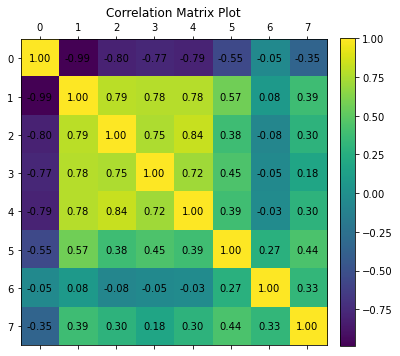

In [6]:
# Correlation Matrix function in Matplotlib 👩‍🚒
fig, ax= plt.subplots(figsize=(6,6))
cp=ax.matshow(correlation_matrix_data)
ax.set_title('Correlation Matrix Plot')
# Annotate the values into correlation plot
for (i, j), z in np.ndenumerate(correlation_matrix_data):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
fig.colorbar(cp, ax=ax,fraction=0.046, pad=0.04);

# fraction=0.046, pad=0.04 seem like a magical combination to keep the colorbar scaled to the plot all the time 🙄

- Seaborn
- sns.heatmap(df.corr())

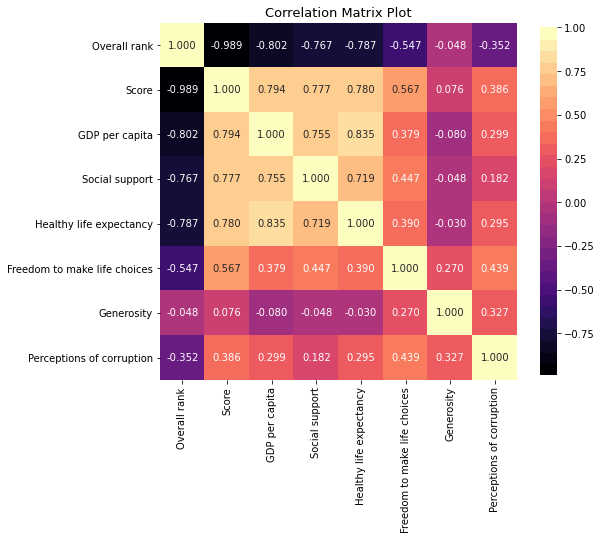

In [7]:
# Correlation Matrix function in Seaborn 👨‍🚀
fig, ax= plt.subplots(figsize=(8,8))
cmap = plt.get_cmap('magma',30)
ax= sns.heatmap(correlation_matrix_data, annot=True, fmt="0.3f", square=True
               ,cmap=cmap, cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix Plot', fontsize=13);

# annot=True: annotate values into the corr matrix
# cbar_kws={"shrink": 0.8} : change the size of the colorbar to 0.8 of the plot 🙆‍♀️

### Pair Plot 😳 <a class="anchor" id="1.2"></a>

- Function: Allow us to see both distribution of single variable and the relationship between them 🧐

In [8]:
# For sake of simplicity, we use pair plot for only 4 attributes, divided into 3 groups of ranking
# Q1: High rank, Q2: Medium rank, Q3: Low rank 😏
Group = np.repeat(np.array(['Q1','Q2','Q3']), [52,52,52], axis=0); Group= pd.Series(Group)
pair_plot_data= data[['Social support','Healthy life expectancy','Score','GDP per capita']]
pair_plot_data['Group']= Group
pair_plot_data.iloc[[0,52,104]]

,Social support,Healthy life expectancy,Score,GDP per capita,Group
0,1.587,0.986,7.769,1.340,Q1
52,1.465,0.812,5.940,1.187,Q2
104,1.030,0.551,4.796,0.764,Q3


- Seaborn
- [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

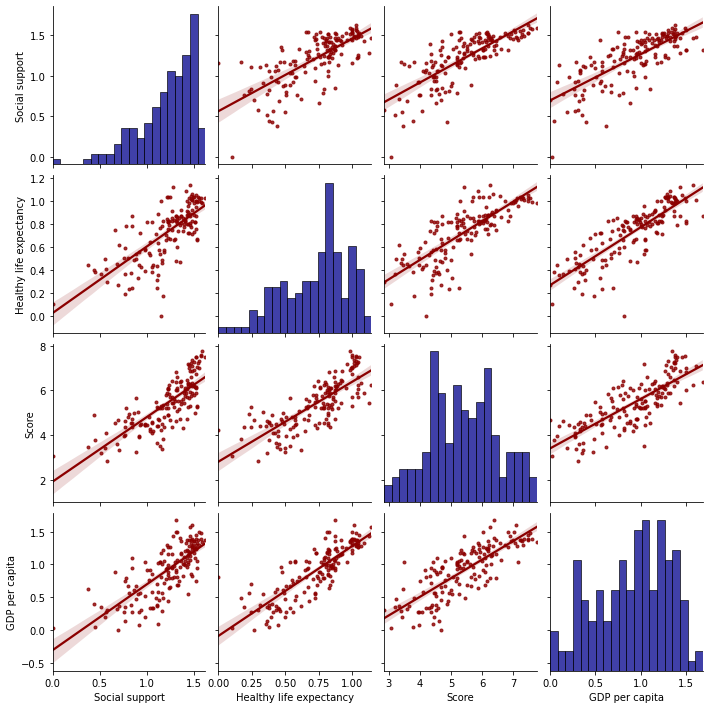

In [9]:
# Pair Plot function in Seaborn
sns.pairplot(data=pair_plot_data, kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=2.5);
# kind: reg(regression line), hist(2d-hist), hex (hex plot), kde (kde)
# size: size of the plot

Note: Usually, the diagonal plots are histogram, we can change it by diag_kind param 😝

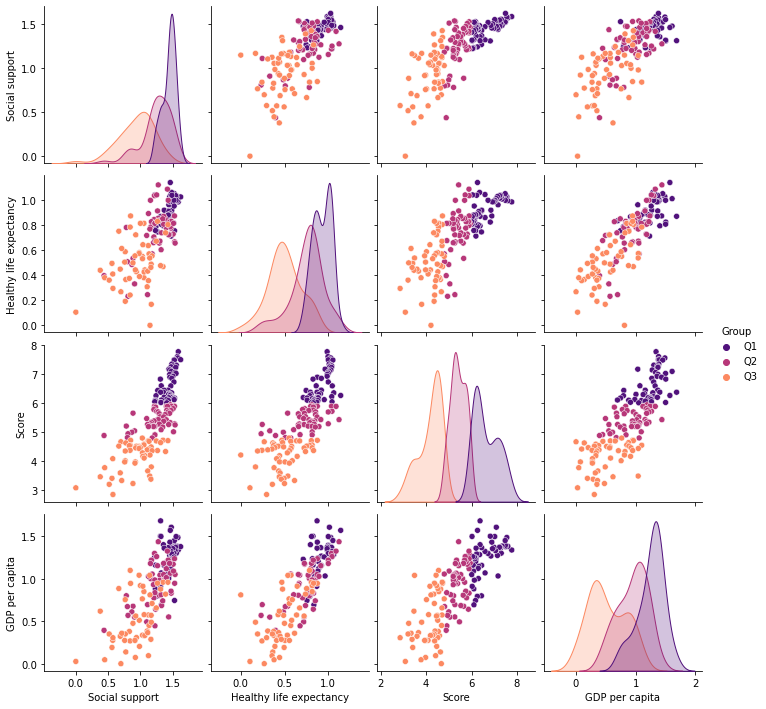

In [10]:
# Pair Plot function in Seaborn by different groups 👀
sns.pairplot(data=pair_plot_data, hue='Group', palette='magma', size=2.5);

### Multiple Plots Types with PairGrid 👨‍👩‍👧‍👧 <a class="anchor" id="1.3"></a>

- Funtion: Freely create plots for 3 main grid sections
    - Upper Triangle
    - Lower Triangle
    - Diagonal

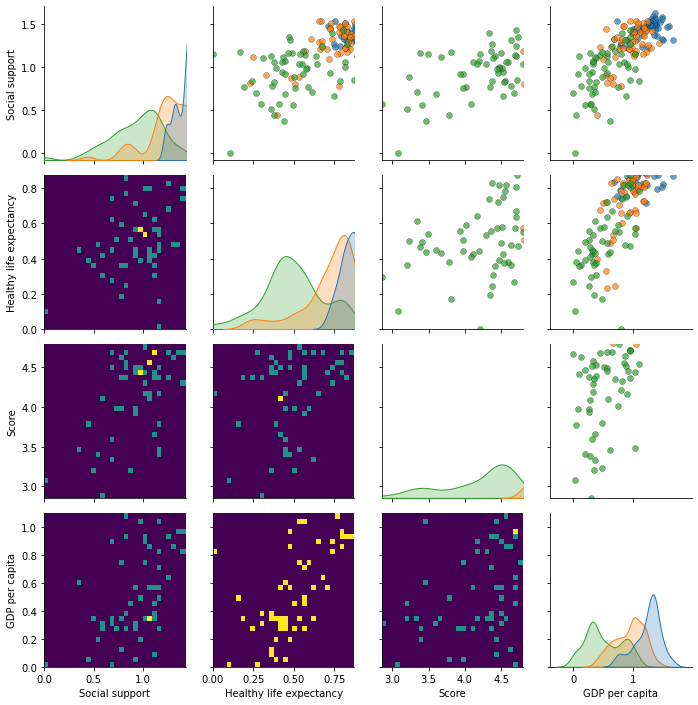

In [11]:
# Create an instance of the PairGrid class
grid = sns.PairGrid(data= pair_plot_data, size = 2.5, hue='Group')
# Optional: Set parameters needed for `hue` (This is only for the case you want to plot for different groups) 
# grid.hue_vals = pair_plot_data["Group"]
# grid.hue_names = pair_plot_data["Group"].unique()
# grid.palette = sns.color_palette("viridis", len(grid.hue_names))

# START!!! 👟

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, linewidths=0.3, edgecolor='black', alpha=0.7) # Scatter Plot for upper side

# Map a histogram to the diagonal
grid = grid.map_diag(sns.kdeplot, fill=True, bw=0.3) # Histogram for diagonal

# Map a density plot to the lower triangle
grid = grid.map_lower(plt.hist2d, bins=30, lw=0.0) # KDE for lower side


### Scatter Matrix 👨‍💻 <a class="anchor" id="1.4"></a>

In [12]:
scatter_matrix_data= data[['Social support','Healthy life expectancy','Score','GDP per capita']]

- Pandas
- [pd.plotting.scatter_matrix()](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

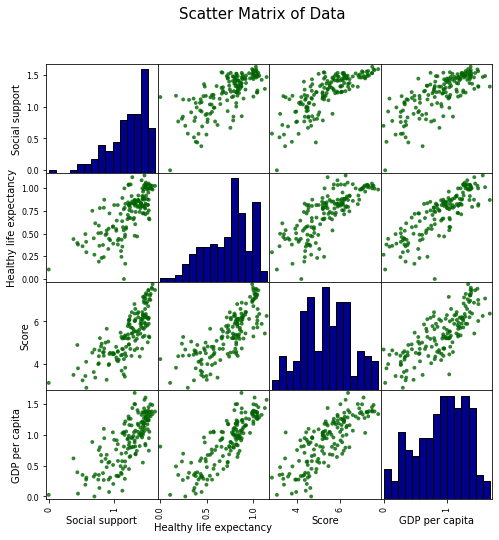

In [13]:
pd.plotting.scatter_matrix(scatter_matrix_data, diagonal='hist', figsize=(8,8),
                           color='darkgreen', marker='.', alpha=0.8, s=60,
                           hist_kwds={'bins':15, 'color':'darkblue','edgecolor':'black'})
plt.suptitle('Scatter Matrix of Data', fontsize=15);

# diagonal: {hist, kde}

========================================================================================================================

## (UNIVARIATE ANALYSIS) VIZ FOR 1 VARIABLE: HISTOGRAM, COUNT PLOT, BOX PLOT, VIOLIN PLOT, BEE SWARM PLOT 👧 <a class="anchor" id="sec2"></a>

### Histogram 🥜 <a class="anchor" id="2.1"></a>

- X data: numeric variable
- Function: Observe the distribution of X variable    

In [14]:
# Lets say I want to see the distribution of the happiness score and GDP per capita🍑
histogram_data= data[['Score','GDP per capita']]
histogram_data.head(3)

,Score,GDP per capita
0,7.769,1.340
1,7.600,1.383
2,7.554,1.488


- Pandas
- [df.plot.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)

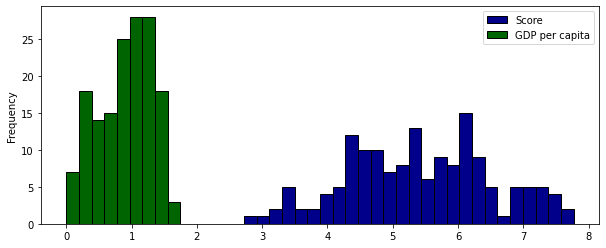

In [15]:
# Histogram function with Pandas 🍐
histogram_data.plot.hist(bins=40, color=['darkblue', 'darkgreen'], figsize=(10,4),
                        edgecolor='black', lw=1);

- Matplotlib
- [plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

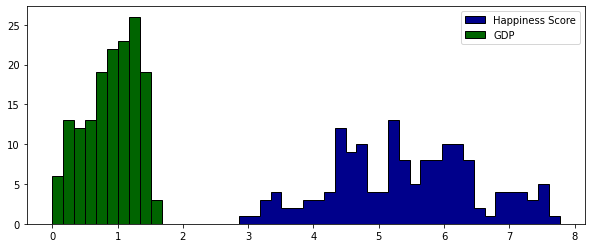

In [16]:
# Histogram function with matplotlib 🍊
fig,ax= plt.subplots(figsize=(10,4))
ax.hist(histogram_data['Score'], bins=30, color='darkblue',histtype='stepfilled',
        edgecolor='black', label='Happiness Score')
ax.hist(histogram_data['GDP per capita'], bins=10, color='darkgreen',histtype='barstacked',
        edgecolor='black', label='GDP')
ax.legend(prop ={'size': 10});

- Seaborn
- [sns.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

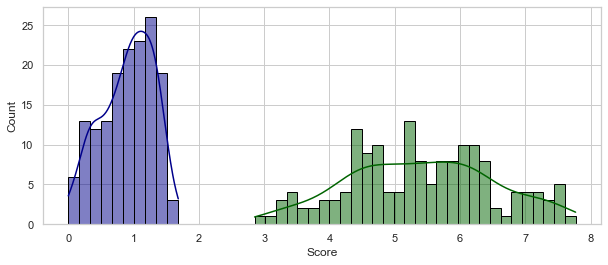

In [17]:
# Histogram function with seaborn 🍋
sns.set(rc={'figure.figsize':(10,4)}) # set figure size
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.histplot(x='Score', data=histogram_data, bins=30, 
                color='darkgreen', edgecolor='black', kde=True)
ax=sns.histplot(x='GDP per capita', data=histogram_data, bins=10, 
                color='darkblue', edgecolor='black', kde=True)

### Count Plot 🌺 <a class="anchor" id="2.2"></a>

- X data: categorical variable 
- Function: number of observations of each category in attribute 

In [18]:
Group = np.repeat(np.array(['H1','H2','H3']), [30,50,76], axis=0); Group= pd.Series(Group)
countplot_data= data['Country or region']
countplot_data['Group']=Group

- Seaborn
- [sns.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)

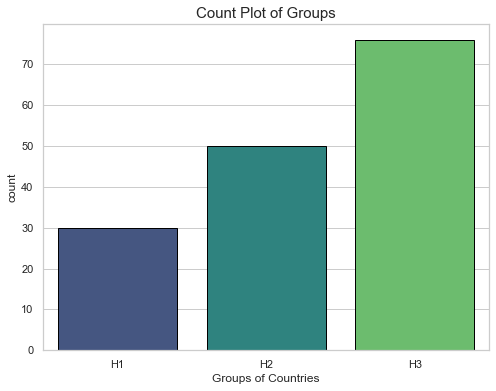

In [20]:
sns.set(rc={'figure.figsize':(8,6)}) # set figure size
sns.set_theme(style='whitegrid')

# Count plot function in Seaborn 
ax= sns.countplot(x='Group', data=countplot_data, palette='viridis', edgecolor='black')
ax.set_title('Count Plot of Groups', fontsize=15)
ax.set_xlabel('Groups of Countries');

### Box Plot 🥞 <a class="anchor" id="2.3"></a>

- X data: numeric variable
- Function: Observe the spread by using metric quantiles (0.25,0.5, 0.75) and see the outliers

In [37]:
# Lets say, I want to see the variation of all numeric variables except for Overall rank and Score 🧳
boxplot_data= data.drop(['Overall rank','Country or region', 'Score'],axis=1)
boxplot_data.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341


- Pandas
- [df.plot.box()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)

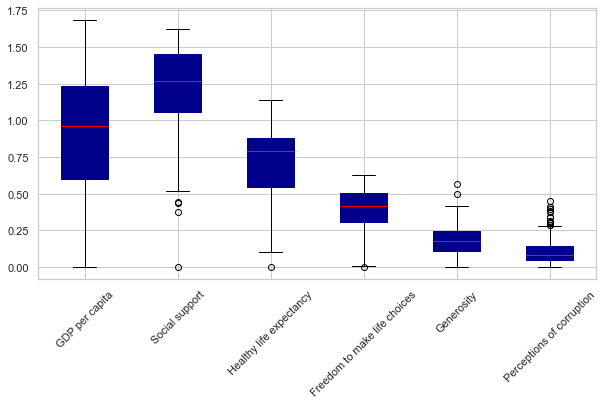

In [39]:
# Set colors for the box 
props = dict(boxes="darkblue", whiskers="black", medians="red", caps="black")
# Box plot function in Pandas 🧵
boxplot_data.plot.box(color=props, patch_artist=True,rot=45, figsize=(10,5));

In [40]:
# Extra: we can also create box plot in groups, how ? 👳
group=np.repeat(np.array(['T1', 'T2','T3', 'T4']), [39,39,39,39], axis=0).tolist()
# Lets say we create one more columns for groups of countries
# we want to observe how GDP per capita varies in each group of countries
df=boxplot_data.copy()
df['Group']= group
df.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
0,1.340,1.587,0.986,0.596,0.153,0.393,T1
1,1.383,1.573,0.996,0.592,0.252,0.410,T1
2,1.488,1.582,1.028,0.603,0.271,0.341,T1


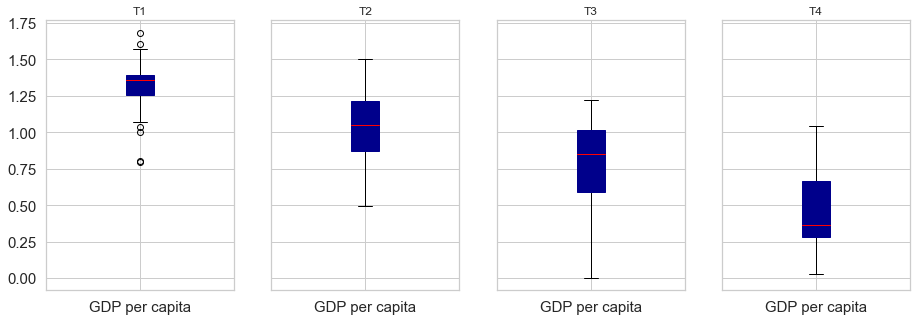

In [41]:
props = dict(boxes="darkblue", whiskers="black", medians="red", caps="black")
df.groupby(by='Group').boxplot(column='GDP per capita',patch_artist=True,
                               color=props,layout=(1,4), fontsize=15, figsize=(15,5));

- Matplotlib 
- [plt.boxplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

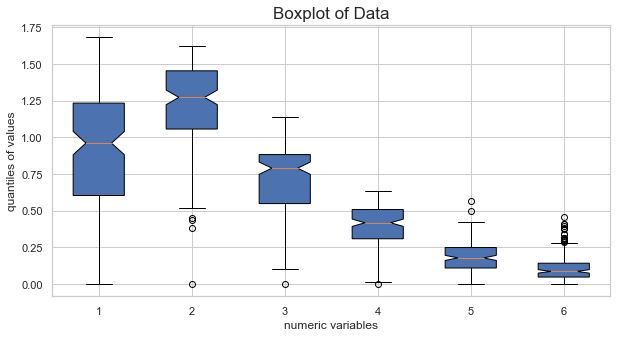

In [42]:
# Boxplot functions in Matplotlib 👗
fig, ax= plt.subplots(figsize=(10,5))
ax.boxplot(boxplot_data.to_numpy(),widths=0.55,patch_artist=True, notch=True)
ax.set_title('Boxplot of Data', fontsize=17)
ax.set_xlabel('numeric variables',fontsize= 12)
ax.set_ylabel('quantiles of values',fontsize= 12);
# Note: Boxplot in matplotlib must be a numpy array @-@
# width: width of the box
# patch_artist=True: Box is filled with color 
# notch = True: notch shape

- Seaborn
- [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

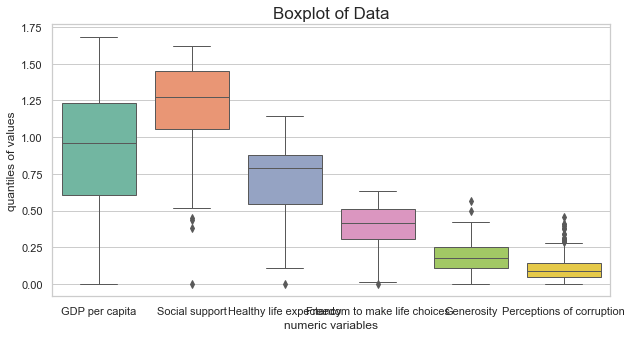

In [43]:
sns.set(rc={'figure.figsize':(10,5)}) # set figure size
sns.set_theme(style='whitegrid')

# Boxplot funcion in Seaborn 👒
ax= sns.boxplot(data=boxplot_data, linewidth=1, palette="Set2")
ax.set_title('Boxplot of Data', fontsize=17)
ax.set_xlabel('numeric variables',fontsize= 12)
ax.set_ylabel('quantiles of values',fontsize= 12);

### Violin Plot 🍬 <a class="anchor" id="2.4"></a>

- X data: numeric variable
- Function: same as Boxplot, but can even see the distribution of variable (using KDE method)

In [44]:
# We use same data used for boxplot 👀
violin_plot_data= data.drop(['Overall rank','Country or region', 'Score'],axis=1)

- Matplotlib 
- [plt.violinplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html)

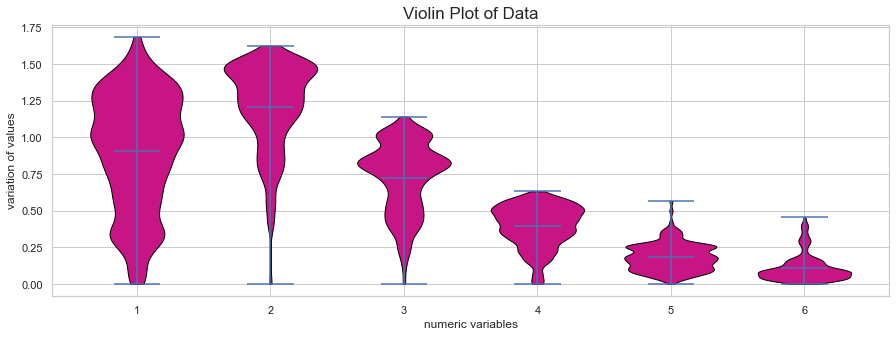

In [45]:
# Violin plot functions in Matplotlib 👗
fig, ax= plt.subplots(figsize=(15,5))
violin=ax.violinplot(violin_plot_data.to_numpy(), widths=0.7, bw_method=0.2
             ,showextrema=True, showmeans=True)

# Title and label of plot 
ax.set_title('Violin Plot of Data', fontsize=17)
ax.set_xlabel('numeric variables',fontsize= 12)
ax.set_ylabel('variation of values',fontsize= 12)

# Color of the plot
for pc in violin['bodies']:
    pc.set_facecolor('mediumvioletred')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.show()

- Seaborn 
- [sns.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

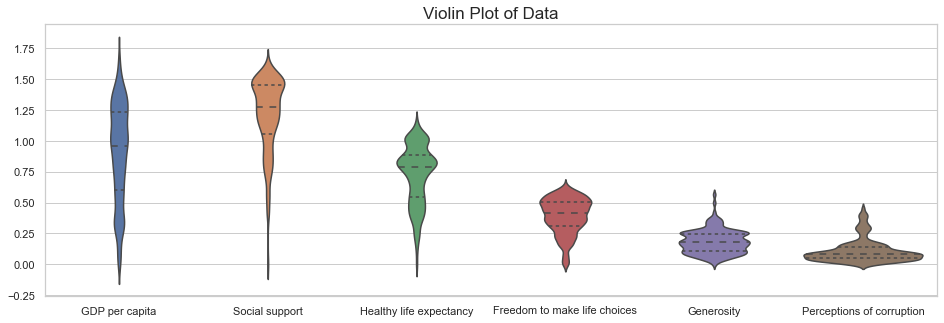

In [46]:
# Violin plot function in Seaborn 👑
sns.set(rc={'figure.figsize':(16,5)}) # set figure size
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.violinplot(data=violin_plot_data, widths=2, bw=0.2, inner="quartile")
ax.set_title('Violin Plot of Data', fontsize=17);
# inner: “box”, “quartile”, “point”, “stick”

### Bee Swarm Plot 🍟 <a class="anchor" id="2.5"></a>

- X data: numeric variable
- Function: same as Boxplot and Violin plot, but can even see the distribution dots of variable (interesting one but rarely used) 

In [47]:
# We use same data used for boxplot 👀
swarm_plot_data= data.drop(['Overall rank','Country or region', 'Score'],axis=1)

- Seaborn
- [sns.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

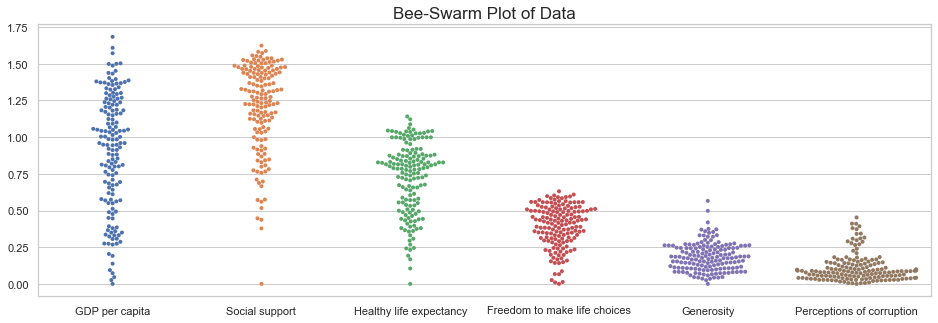

In [48]:
# Bee swarm plot function in Seaborn 👄
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.swarmplot(data=swarm_plot_data, size=4)
ax.set_title('Bee-Swarm Plot of Data', fontsize=17);

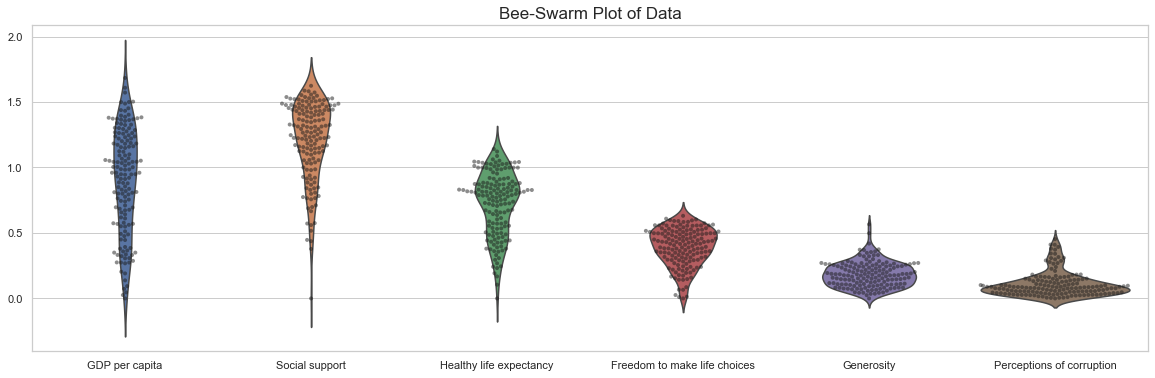

In [49]:
# We can also combine the Violin plot with the Bee-swarm plot, how? 👭
sns.set(rc={'figure.figsize':(20,6)}) # set figure size
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.violinplot(data=swarm_plot_data, inner=None)
ax=sns.swarmplot(data=swarm_plot_data, size=4, color='k', alpha=0.5)
ax.set_title('Bee-Swarm Plot of Data', fontsize=17);

========================================================================================================================

## (BIVARIATE ANALYSIS) VIZ FOR 2 VARIBALES : BAR PLOT, SCATTER PLOT, LINE PLOT 💑 <a class="anchor" id="sec3"></a>

### Bar Plot 🍡 <a class="anchor" id="3.1"></a>

- X data: categorical variable, discrete numeric variable
- Y data: numeric variables
- Function: Compare discrete values

In [50]:
# Lets say, I want to create bar plot to see the score of top-5 happiest countries, and bottom-5 least happy countries 🤭
top_5= data[['Country or region','Score']].head(5)
bottom_5= data[['Country or region','Score']].tail(5)
bar_plot_data= pd.concat([top_5, bottom_5], keys=['5 happiest countries','5 least happy countries'])
bar_plot_data

Country or region  Score
5 happiest countries    0                     Finland  7.769
                        1                     Denmark  7.600
                        2                      Norway  7.554
                        3                     Iceland  7.494
                        4                 Netherlands  7.488
5 least happy countries 151                    Rwanda  3.334
                        152                  Tanzania  3.231
                        153               Afghanistan  3.203
                        154  Central African Republic  3.083
                        155               South Sudan  2.853

- Pandas
- [df.plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

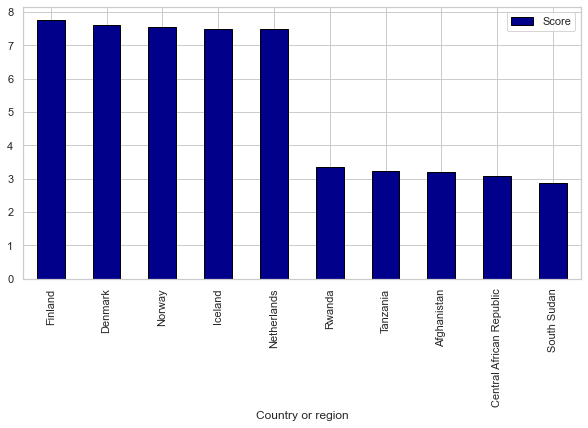

In [52]:
# Bar plot function in Pandas 🤟
bar_plot_data.plot.bar(x='Country or region', y='Score', figsize=(10,5), color='darkblue',edgecolor='black');

# figsize(): size of graph

- Matplotlib
- [plt.bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

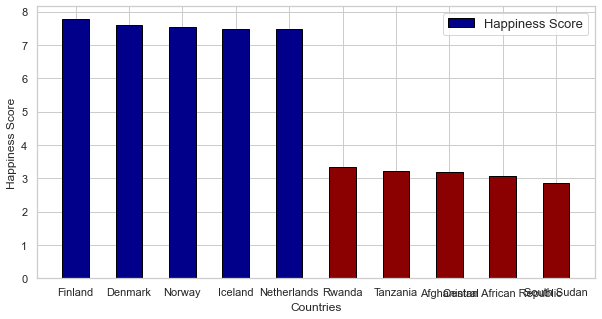

In [53]:
# Bar plot function in Matplotlib 🤘
color=np.repeat(np.array(['darkblue', 'darkred']), [5,5], axis=0).tolist() # create color list

fig, ax= plt.subplots(figsize=(10,5))
ax.bar(x= 'Country or region',height='Score',label='Happiness Score', data= bar_plot_data,width=0.5, 
       edgecolor='black',color=color)
ax.set_xlabel('Countries')
ax.set_ylabel('Happiness Score')
ax.legend(prop ={'size': 13});

# width: width of the bar

Note: The coding in Matplotlib is more complicated, but we have more control over our plot 💪

- Seaborn
- [sns.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)

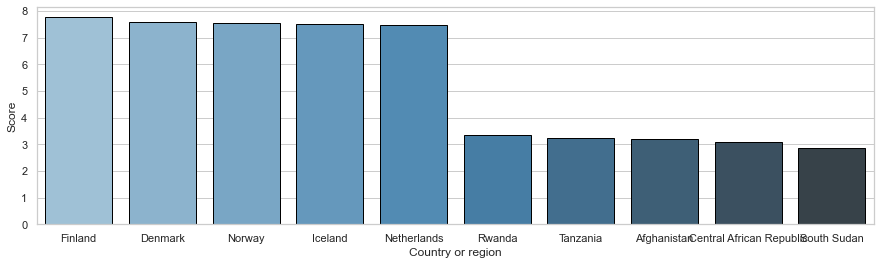

In [54]:
# Bar plot function in Seaborn 👑
sns.set(rc={'figure.figsize':(15,4)}) # set figure size
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.barplot(x='Country or region',y='Score', data=bar_plot_data,palette="Blues_d",edgecolor='black')

___

### Scatter Plot 👙 <a class="anchor" id="3.2"></a>

- X data: numeric variable
- Y data: numeric variable

In [55]:
# Lets say, I want to create scatter plot between x:GDP (or Corruption index) and y:happiness score 😝
scatter_plot_data= data[['GDP per capita','Perceptions of corruption','Score']]
scatter_plot_data.head(3)

,GDP per capita,Perceptions of corruption,Score
0,1.340,0.393,7.769
1,1.383,0.410,7.600
2,1.488,0.341,7.554


- Pandas
- [df.plot.scatter()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

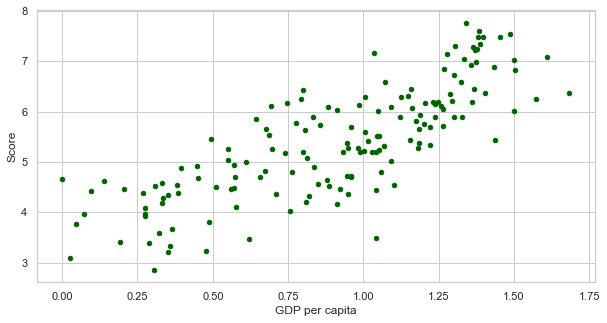

In [56]:
# Scatter plot function in Pandas 👾
scatter_plot_data.plot.scatter(x='GDP per capita', y='Score', color='darkgreen', figsize=(10,5));

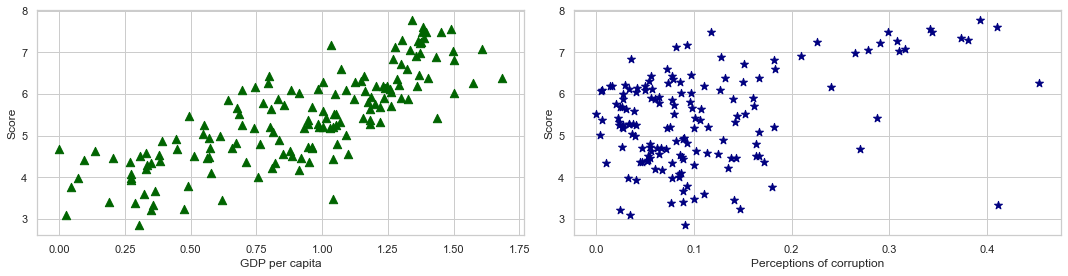

In [57]:
# We can make multiple scatter plot at the same time, how? 😼
fig, ax= plt.subplots(ncols=2)
scatter_plot_data.plot.scatter(x='GDP per capita', y='Score',marker='^',s=70,
                               color='darkgreen',ax=ax[0])
scatter_plot_data.plot.scatter(x='Perceptions of corruption', y='Score',marker='*',s=70, 
                               color='navy',ax=ax[1])
fig.tight_layout();

- Matplotlib
- [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

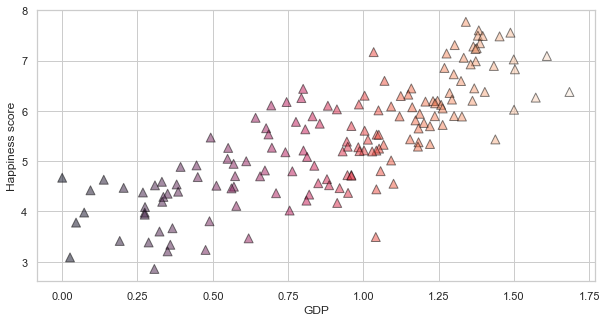

In [58]:
fig,ax= plt.subplots(figsize=(10,5))
ax.scatter(x='GDP per capita', y='Score', data= scatter_plot_data, marker='^',
          s=80, c='GDP per capita', edgecolors='black', alpha=0.5)
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness score');

# s: size of marker
# c: color by variable

- Seaborn
- [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

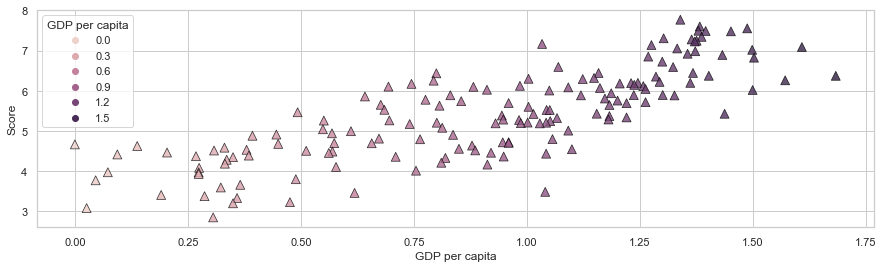

In [59]:
sns.scatterplot(x='GDP per capita', y='Score', hue='GDP per capita',data= scatter_plot_data,
                marker='^', s=80, edgecolor='black', alpha=0.8);

**Scatter Plot with Linear Regression line** 🕶

- Seaborn
- [sns.lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

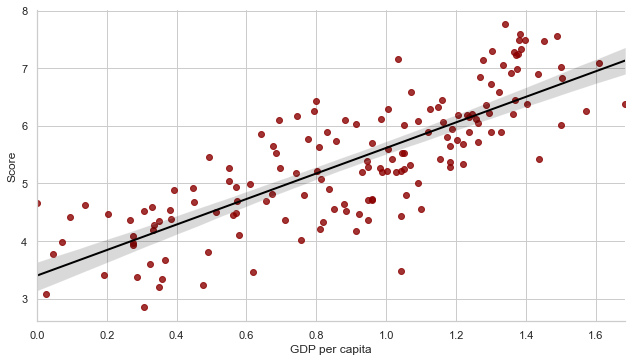

In [60]:
sns.lmplot(x='GDP per capita', y='Score', data=scatter_plot_data,
          scatter_kws={'color':'darkred', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=5, aspect=1.75);

# height, aspect: determine the figure size

### Line Plot 🥓 <a class="anchor" id="3.3"></a>

- X data: numerical variable
- Y data: numerical variable

In [61]:
# Lets say I want to see the relationship between  GDP, social support, health life expectancy over all ranks 🥃
# Note: actually, we usually use the line graph for time series data @-@
line_plot_data= data[['Overall rank','GDP per capita','Social support','Healthy life expectancy']]
line_plot_data.head(3)

,Overall rank,GDP per capita,Social support,Healthy life expectancy
0,1,1.340,1.587,0.986
1,2,1.383,1.573,0.996
2,3,1.488,1.582,1.028


- Pandas
- [df.plot.line()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)

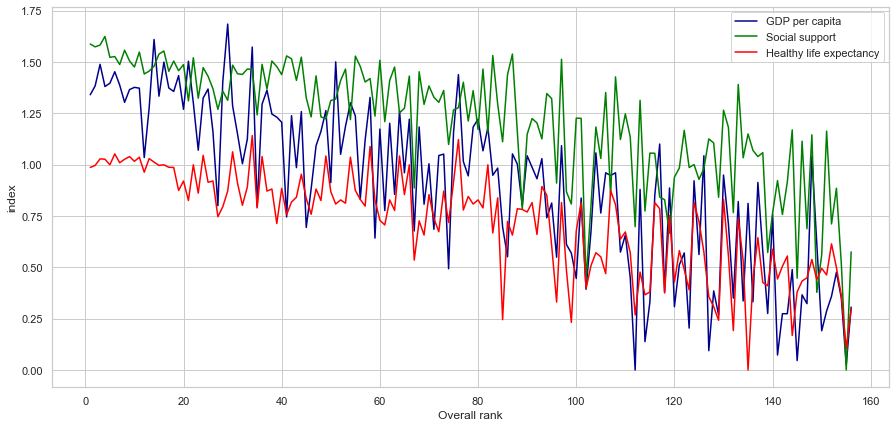

In [62]:
line_plot_data.plot.line(x='Overall rank', y=['GDP per capita','Social support','Healthy life expectancy'], 
                         color=['darkblue', 'green', 'red'], ylabel='index', figsize=(15,7));

- Matplotlib
- [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

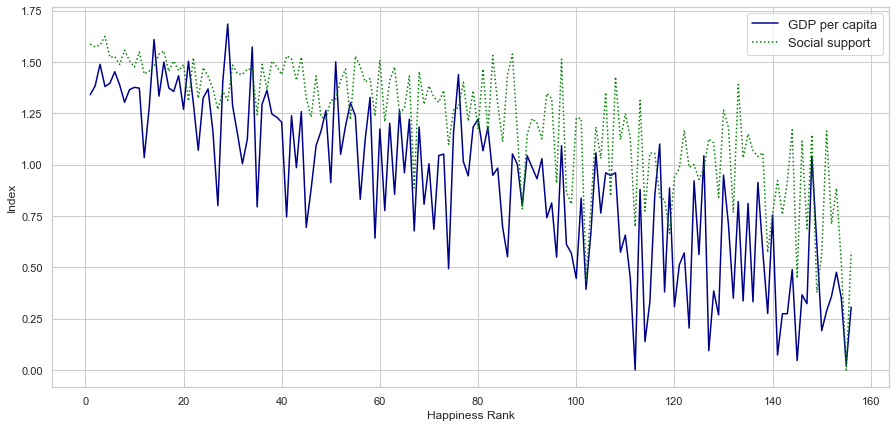

In [63]:
fig, ax= plt.subplots(figsize=(15,7))
ax.plot('Overall rank', 'GDP per capita', data= line_plot_data, color='darkblue', ls='-', lw=1.5)
ax.plot('Overall rank', 'Social support', data= line_plot_data, color='green', ls=':', lw=1.5)
ax.set_xlabel('Happiness Rank')
ax.set_ylabel('Index')
ax.legend(prop ={'size': 13});

# ls: line style
# lw: line width

- Seaborn
- [sns.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

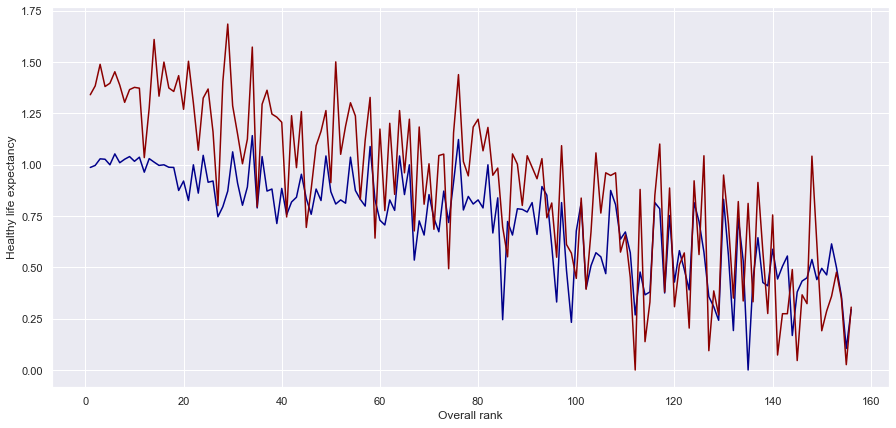

In [64]:
sns.set(rc={'figure.figsize':(15,7)}) # set figure size
sns.lineplot(x= 'Overall rank', y='Healthy life expectancy', data=line_plot_data, color='darkblue')
sns.lineplot(x= 'Overall rank', y='GDP per capita', data=line_plot_data, color='darkred');

### Combined Plots 🤫

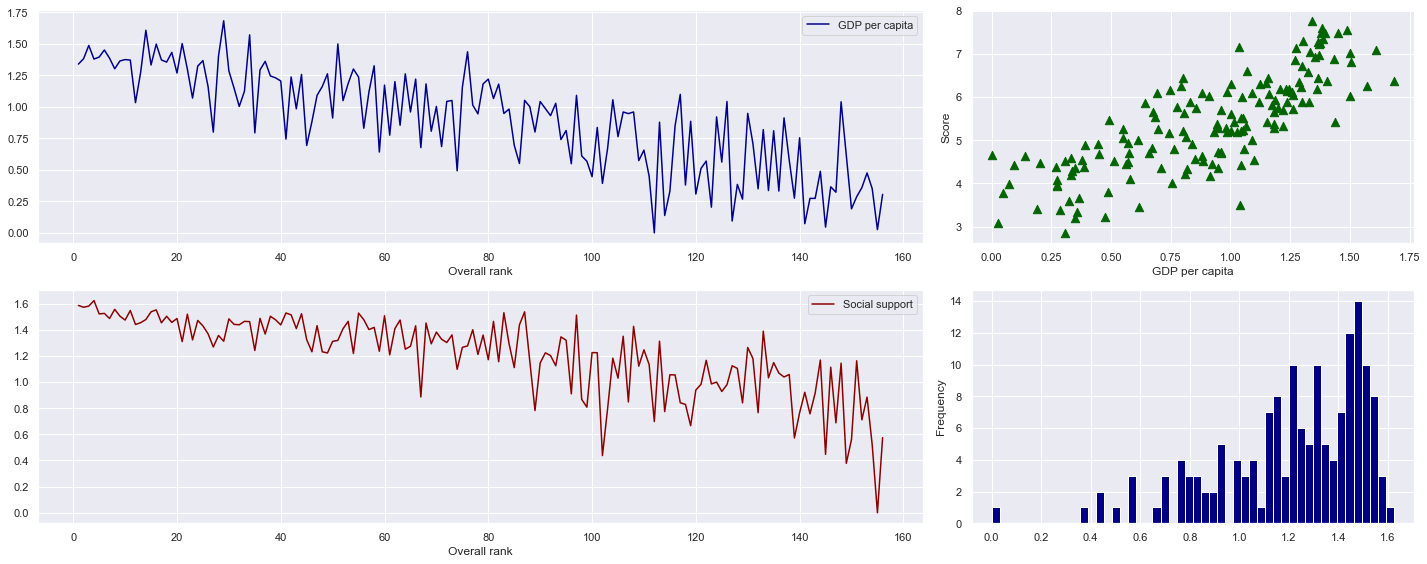

In [66]:
fig, ax = plt.subplots(nrows=2 ,ncols=2,figsize=(20,8), gridspec_kw={"width_ratios": [2,1], "height_ratios":[1,1]})
line_plot_data.plot.line(x='Overall rank', y='GDP per capita', color='darkblue',ax=ax[0,0]) 
scatter_plot_data.plot.scatter(x='GDP per capita', y='Score',marker='^',s=70,color='darkgreen',ax=ax[0,1])
line_plot_data.plot.line(x='Overall rank', y='Social support', color='darkred',ax=ax[1,0]) 
data['Social support'].plot.hist( bins=50, color='navy',xlabel='social support index',ax=ax[1,1])
fig.tight_layout();

========================================================================================================================

## VIZ WITH THE TABLE 🧣 <a class="anchor" id="sec4"></a>

In [67]:
import string

In [68]:
# Lets say I have a portfolio of 10 assets (A-J) with recorded return in 5 months 👠
df= pd.DataFrame(np.random.normal(size=(5,10)) ,columns=[x for x in string.ascii_uppercase[:10]])
df

,A,B,C,D,E,F,G,H,I,J
0,-0.064111,-0.444955,-0.732260,0.306262,1.279283,-0.259618,0.236104,0.298573,-0.753300,-0.031719
1,-0.088169,0.505575,-0.894587,-1.067425,-0.591403,-0.606276,0.465875,0.197640,-2.059924,0.355204
2,-1.174839,0.532044,0.018428,1.105389,0.198341,-1.100421,0.947606,0.386423,-0.386273,1.011486
3,-2.106752,0.081653,-0.249539,0.017554,-2.481489,0.705486,0.386144,-0.847634,-0.608642,-0.043895
4,0.668861,0.129004,-1.818651,-0.485191,2.332384,0.016720,-0.894416,1.066658,0.235951,0.267177


### Color with Conditions 👕 <a class="anchor" id="4.1"></a>

- Pandas
- [df.style.applymap()](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [69]:
# Example for function to color positive and negative values 👒
def negative_value(x, col1, col2):
    return f"color: {col1 if x < 0 else col2}"
df.style.applymap(negative_value, col1='red', col2='darkgreen')

,A,B,C,D,E,F,G,H,I,J
0,-0.064111,-0.444955,-0.732260,0.306262,1.279283,-0.259618,0.236104,0.298573,-0.753300,-0.031719
1,-0.088169,0.505575,-0.894587,-1.067425,-0.591403,-0.606276,0.465875,0.197640,-2.059924,0.355204
2,-1.174839,0.532044,0.018428,1.105389,0.198341,-1.100421,0.947606,0.386423,-0.386273,1.011486
3,-2.106752,0.081653,-0.249539,0.017554,-2.481489,0.705486,0.386144,-0.847634,-0.608642,-0.043895
4,0.668861,0.129004,-1.818651,-0.485191,2.332384,0.016720,-0.894416,1.066658,0.235951,0.267177


### Color the background in gradient style 🥻 <a class="anchor" id="4.2"></a>

- Pandas
- [df.style.background()](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

In [70]:
df.style.background_gradient(cmap='viridis')

,A,B,C,D,E,F,G,H,I,J
0,-0.064111,-0.444955,-0.732260,0.306262,1.279283,-0.259618,0.236104,0.298573,-0.753300,-0.031719
1,-0.088169,0.505575,-0.894587,-1.067425,-0.591403,-0.606276,0.465875,0.197640,-2.059924,0.355204
2,-1.174839,0.532044,0.018428,1.105389,0.198341,-1.100421,0.947606,0.386423,-0.386273,1.011486
3,-2.106752,0.081653,-0.249539,0.017554,-2.481489,0.705486,0.386144,-0.847634,-0.608642,-0.043895
4,0.668861,0.129004,-1.818651,-0.485191,2.332384,0.016720,-0.894416,1.066658,0.235951,0.267177


========================================================================================================================

 ## (MULTIVARIATE ANALYSIS) ADVANCED VIZ: 2D-HEATMAP, HEX PLOT, CONTOUR PLOT, KDE , JOINT PLOT, 3D PLOT, MANIFOLD LEARNING PLOT 👨‍🦼 <a class="anchor" id="sec5"></a>

These advanced plots have 2 main useful functions:
- Help to get a sense about the joint distribution function of 2 numerical variables. 
- Show 3-dimensional surface on 2D graph 🚀

### 2D-Density Heatmap (Histogram) 🧣 <a class="anchor" id="5.1"></a>

- X data: 2 numerical variables
- Function: Type of histogram for 2 variables , frequency visualized by color

In [71]:
# Lets say we want to build a 2d-histogram with 2 variables: Social support and Healthy life expectancy 🧙🏼‍♂️
heatmap_data= data[['Social support','Healthy life expectancy']]
heatmap_data.head(3)

,Social support,Healthy life expectancy
0,1.587,0.986
1,1.573,0.996
2,1.582,1.028


- Matplotlib 
- [plt.hist2d()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html)

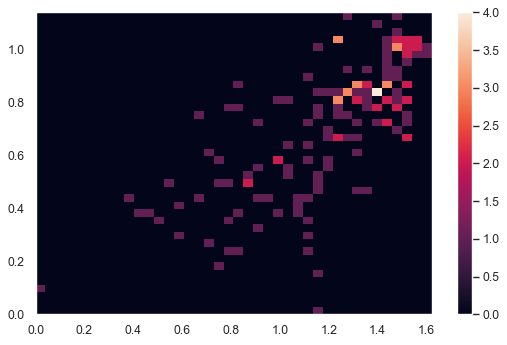

In [72]:
figure(figsize=(8, 5), dpi=80) # Set the figure size

# Heat Map function in Matplotlib 🗃
plt.hist2d(x='Social support', y= 'Healthy life expectancy', data=heatmap_data,
         bins=40, lw=0.0)
plt.colorbar(); 

Note: We can also plot Density Heatmap by package Plotly [Plotly Heat Map](https://plotly.com/python/2D-Histogram/)

### 2D-Hex Plot 💎 <a class="anchor" id="5.2"></a>

- X data: 2 numerical variables
- Function: Type of histogram for 2 variables , frequency visualized by color

In [73]:
hex_plot_data= heatmap_data

- Pandas
- [df.plot.hexbin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hexbin.html)

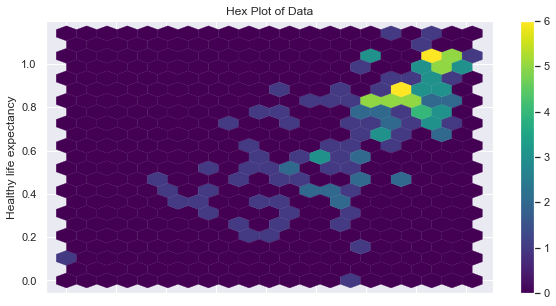

In [74]:
hex_plot_data.plot.hexbin(x='Social support', y='Healthy life expectancy', title='Hex Plot of Data',
                         gridsize=20, linewidth=0.3, figsize=(10,5), cmap='viridis');

- Matplotlib 
- [plt.hexbin()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html)

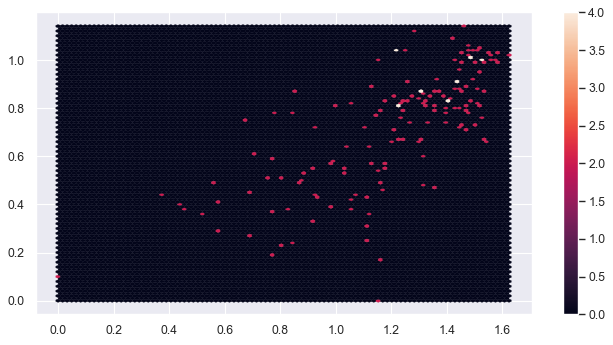

In [75]:
figure(figsize=(10,5), dpi=80) # Set the figure size

# Hex Plot function in Matplotlib ⚖️
plt.hexbin(x=heatmap_data['Social support'], y= hex_plot_data['Healthy life expectancy'],
         bins=5, lw=0.3)
plt.colorbar();

### Contour Plot 🦺 <a class="anchor" id="5.3"></a>

- X data: 3 numerical variables, or 2 numerical variables with the 3rd metrics of those 2
- Function: 3D graph visualized by curves (contour line) in 2D 🗺

In [76]:
# It's easiest to show these plots using data with broader shapes, so let's make some ⛲️
space_X = np.linspace(0, 20, 500)
space_Y = np.linspace(0, 30, 600)
X, Y = np.meshgrid(space_X, space_Y)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

- Matplotlib
- [plt.contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)
- [plt.contourf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)

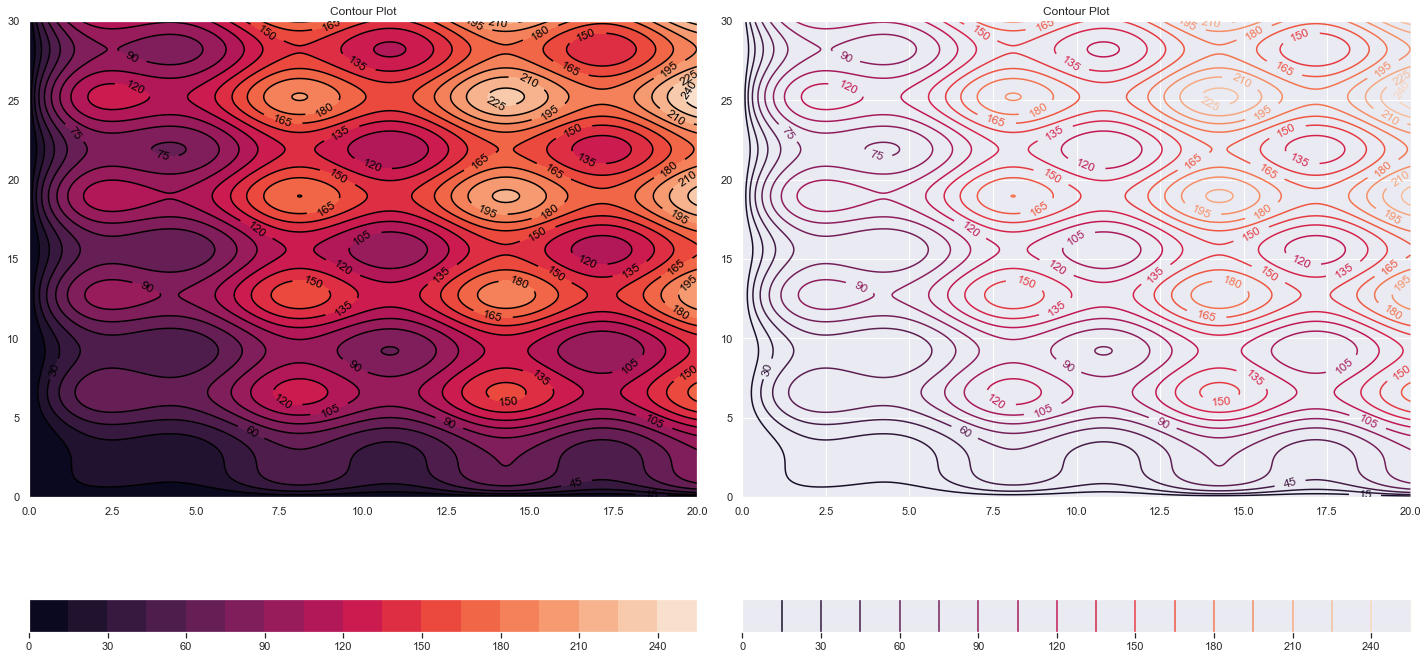

In [77]:
# Contour plot function in Matplotlib 🚲
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
# First contour plot with filled color
cp_00=ax[0].contourf(X,Y,Z, levels=20)
cp_0= ax[0].contour(X,Y,Z, levels=20, colors='black')
ax[0].clabel(cp_0, inline=True, fmt="%0.0f") # add the height for our plot @-@
ax[0].set_title('Contour Plot')
fig.colorbar(cp_00, ax=ax[0], orientation='horizontal')

# Second contour plot with only contour lines 
cp_1= ax[1].contour(X,Y,Z, levels=20)
ax[1].clabel(cp_1, inline=True, fmt="%0.0f") # add the height for our plot @-@
ax[1].set_title('Contour Plot')
fig.colorbar(cp_1, ax=ax[1],orientation='horizontal')
fig.tight_layout();

# level: number of contour lines
# fmt: for eg, 0.1f is take 1 decimal place @-@

### KDE Plot 🧜🏼 <a class="anchor" id="5.4"></a>

- X data: 1 or 2 numeric variable(s)
- Function: Used to see the (joint) distribution function of variable(s)
-In order to understand KDE, visit this page: [KDE](https://mathisonian.github.io/kde/)

In [78]:
# For 1 variable
# We plot KDE curve for Score variable 💃
kde_data_1= data['Score']

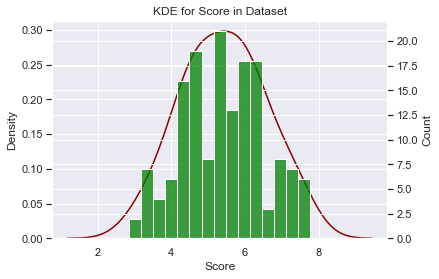

In [79]:
# KDE plot function in Seaborn
fig,ax1=plt.subplots(figsize=(6,4))
sns.kdeplot(kde_data_1, bw=0.5,
           color='darkred', ax=ax1)

# Adding the Histtogram 🤴
ax2= ax1.twinx() # Create the twin axis
sns.histplot(kde_data_1,bins=15,
            color='green', ax=ax2)
ax1.set_title('KDE for Score in Dataset');

# ax.twinx(): Create a twin Axes sharing the xaxis

In [80]:
# For 2 variables
# We use the same dataset for heatmap and hexplot 🌄
kde_data_2= hex_plot_data

- Seaborn
- [sns.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

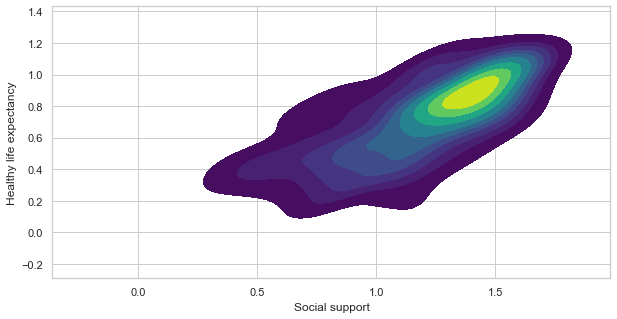

In [81]:
sns.set(rc={'figure.figsize':(10,5)}) # set figure size
sns.set_theme(style='whitegrid') # theme of the graph

# KDE plot function in Seaborn
sns.kdeplot(x='Social support', y='Healthy life expectancy',data=kde_data_2,
            bw=0.4 ,cmap='viridis', fill=True);

### Joint Plot 🏳️‍🌈 <a class="anchor" id="5.5"></a>

- X data: numeric variable
- Y data: numeric variable
- Function: Combine scatter plot of X,Y data,and combine with histograms of each 

In [82]:
# Lets say that we want to see the relationship between Social support and Life expectancy and distribution of each one 
# We're also interested in how they are related by groups, hence we use same data as pair plot data 🤔
joint_plot_data= pair_plot_data
joint_plot_data.iloc[[0,52,104]]

,Social support,Healthy life expectancy,Score,GDP per capita,Group
0,1.587,0.986,7.769,1.340,Q1
52,1.465,0.812,5.940,1.187,Q2
104,1.030,0.551,4.796,0.764,Q3


- Seaborn
- [sns.jointplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

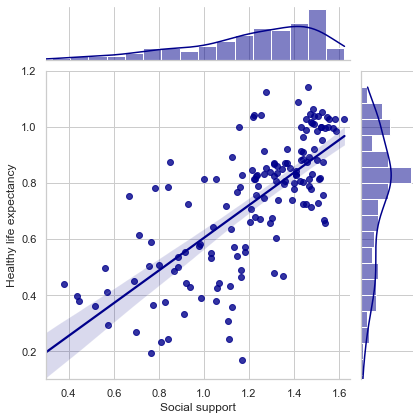

In [83]:
# Joint Plot in Seaborn 🤠
sns.jointplot(x='Social support', y='Healthy life expectancy',data=joint_plot_data, 
              xlim=(0.3,1.65), ylim=(0.1,1.2),color='darkblue',marginal_kws={"bins": 20}, kind='reg');

# kind: reg(regression line), hist(2d-hist), hex (hex plot), kde (kde)
# marginal_kws : marginal plots on the side

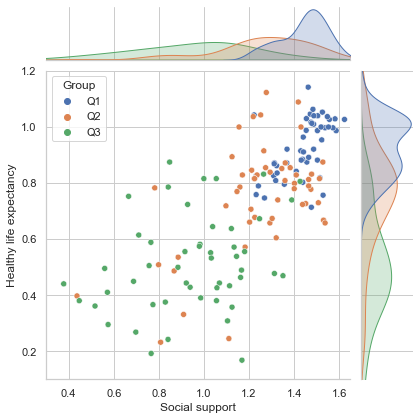

In [84]:
# Joint Plot in Seaborn by groups 🤠
sns.jointplot(x='Social support', y='Healthy life expectancy',data=joint_plot_data, 
              xlim=(0.3,1.65), ylim=(0.1,1.2),hue='Group');